# Segmentation en région

## 1 - Explication 

- La segmentation en régions est basée sur l'analyse des composants connectés


- C'est une technique de vision par ordinateur qui permet d'étiquetter des élément disjoints d'une image avec des étiquettes uniques


- La segmentation en régions cherche à regrouper les pixels d'une image en fonction de leur connectivité


- Elle repose sur la recherche de zones possédant des attributs communs

## 2 - Mise en oeuvre


- Binarisation ou seuillage de l'image (séparation des objets d'intèrêt de l'arrière plan)


- Elimination du bruit de l'image


- Mise en oeuvre de l'analyse des composants connectés sur l'image binarisée


Cette dernière opération produit une image étiquetée avec des valeurs entières de pixels sachant que les pixels de même valeur appartiennent au même objet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, label2rgb
from skimage.filters import gaussian
from skimage.measure import label

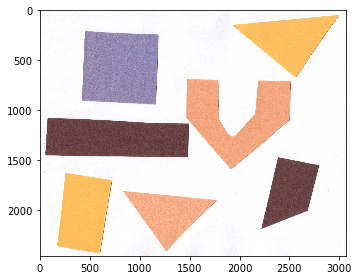

In [2]:
image = imread('image.jpg')
imshow(image)

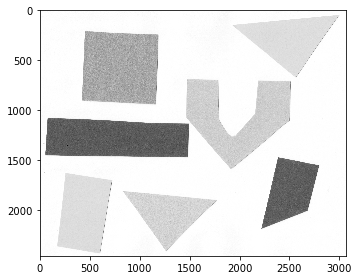

In [3]:
gray_image = rgb2gray(image)
imshow(gray_image,cmap='Greys_r')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


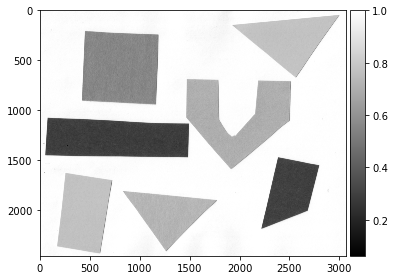

In [4]:
# Elimination du bruit de l'image avec le filtre Gauss

blur_image = gaussian(gray_image,sigma=2)

imshow(blur_image,cmap='gray')

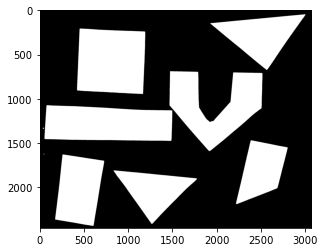

In [5]:
# binarisation de l'image pour séparer les objets d'intèrêt de l'image

t = 0.9

binary_image = blur_image < t
plt.imshow(binary_image,cmap='gray')

### Mise en oeuvre de la segmentation en régions

- La fonction label du module skimage.measure etiquette les régions de l'image d'entrée en fonction de la connectivité des pixels entre eux


- Tant que les pixels voisins partagent la même valeur ou des valeurs très proches, ils sont étiquetés comme une seule région


- Cette fonction renverra un tableau étiquitté où tous les composants connectés se voient attribuer la même valeur entière

In [6]:
ettiquette_image,nbre_regions = label(binary_image,connectivity = 2, return_num = True)

In [7]:
# nombre de composant obtenus 
nbre_regions

11

- L'argument connectivity indique à la fonction label la démarche à utiliser pour identifier tous les pixels connectés d'un objet. Il vaut 1 ou 2


- L'argument return_num = True permet de renvyer le nombre de composanr connectés (ou région) obtenues

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


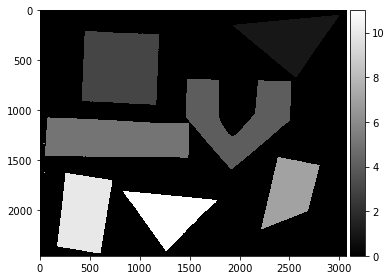

In [8]:
# affichege des résultats de l'Analyse des comosants connectés (ACC)

imshow(ettiquette_image, cmap='gray')

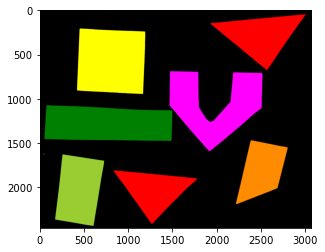

In [9]:
# coloration de chaque composant connecté

color_label_image = label2rgb(ettiquette_image, bg_label = 0)

plt.imshow(color_label_image)

## 3 - Définition d'une fonction qui effectue l'analyse des composanrs connectés


In [10]:
def composants_connectes(fichier_image,sigma,t,indice_connectivity) :
    
    #chargement de l'image
    
    image = imread(fichier_image)
    
    # conversion en nuance de gris
    
    gray_image = rgb2gray(image)
    
    # elimination du bruit avec un filtre gaussien
    
    blur_image = gaussian (gray_image, sigma = sigma)
    
    # seuillage pour séparer les objets d'intèrêt de l'arrière plan
    
    binary_image = blur_image < t
    
    # mise en oeuvre de l'acc
    
    etiquette_image,nbre_regions = label(binary_image, connectivity = indice_connectivity, return_num = True)
    
    return etiquette_image,nbre_regions

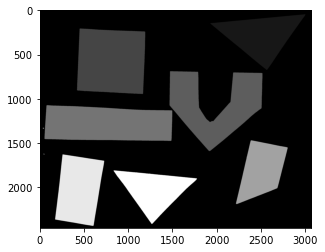

In [11]:
img,nbre = composants_connectes('image.jpg',2,0.9,2)

plt.imshow(img,cmap='gray')

- abaisser le seuil entrainera moins d'onjet car plus le seuil est elevé, plus il y a d'objet trouvé. De plus en plus de bruit de fond est capté sous forme d'objet.


- les valeurs de sigma plus grande produisent des masses binaires avec moins de bruit et donc un plus petit nombre d'objet


- une valeur sigma trop élevé risque de fusionner des objets

## 4 - Influence des valeurs de sigma et du seuil de seuillage sur la détermination du nombre de composant connecté

### 4 - 1 - Combien d'objet sont contenu dans l'image


#### Méthode 1


In [12]:
nbre_regions

11

#### Méthode 2 

Tous les objets identifiés dans l'image portent les numéro 0,1,2,3,....; 0 désigne l'arrière plan donc d'objet détectés équivaut à l'index du dernier objet



In [13]:
nbre_objets = np.max(ettiquette_image)

nbre_objets

11

- Sur l'image, nous voyons 7 objets alors que l'algo en détecte 11 


- Cela est du au bruit c'est à dire de petit objet sans intèrêt présent sur l'image


- Pour résoudre ce problème, il faut agir sur les valeurs du paramètre de filtrage sigma et du seuil t 

In [14]:
etiquette_image,nbre_regions=composants_connectes(fichier_image='image.jpg', sigma =3 , t = 0.8 , indice_connectivity = 2)

In [15]:
print ("le nombre d'ojets détectés est :" , nbre_regions)

le nombre d'ojets détectés est : 8


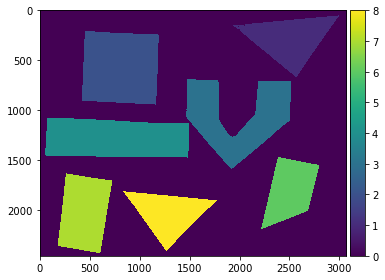

In [16]:
imshow(etiquette_image)

* a chaque valeur donné du paramètre de filtrage sigma et du seuil t correspond un nombre d'objet détecté



* il n'est pas aisé de trouver la combinaison optimal des valeurs de sigma et t permettant de detecté convenablement des objets sur l'image


* nous avons donc besoin d'un autre critère pour détecté les objets